In [14]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import get_data_loaders, train, test
from PIL import Image
import pandas as pd

### CIFAR100 Distilled

In [15]:
class CIFAR100_Distilled(Dataset):
    def __init__(self, idx_df, transform):
        self.idx_df = idx_df
        self.transform = transform
    
    def __len__(self):
        return len(self.idx_df)

    def __getitem__(self, index):
        entry = self.idx_df.iloc[index]
        image = self.transform(Image.open(entry.image_path))
        label = entry.label
        return image, torch.tensor(label)

In [16]:
index_file = pd.read_csv('./coreset_index/ipc50_idx.csv')
index_file

,image_path,label
0,./CIFAR100_Coreset/apple/020a5cb9-fd6c-4bc6-b8...,0
1,./CIFAR100_Coreset/apple/04a968b2-3ec6-462c-8f...,0
2,./CIFAR100_Coreset/apple/0cff5c83-a091-4117-a5...,0
3,./CIFAR100_Coreset/apple/0dea64fd-07a0-4e8a-92...,0
4,./CIFAR100_Coreset/apple/10a21297-6965-4518-97...,0
...,...,...
4995,./CIFAR100_Coreset/worm/ecf876bb-10e9-4731-b42...,99
4996,./CIFAR100_Coreset/worm/f20fc518-dd28-42eb-a0c...,99
4997,./CIFAR100_Coreset/worm/f893c524-5be5-49cf-ae6...,99
4998,./CIFAR100_Coreset/worm/fa9ff14c-dc54-457f-82b...,99


In [17]:
image_normalize= transforms.Lambda(lambda img: 2 * img / 255. - 1) # normalize to [-1, 1]
# https://github.com/Lornatang/pytorch-alexnet-cifar100/blob/master/utils/datasets.py
transform = transforms.Compose([
                                transforms.Resize(128),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                # image_normalize,
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                              ])
cifar100_distilled_train = CIFAR100_Distilled(index_file, transform)

cifar100_root = '../cifar100'
cifar100_test = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                transforms.Resize(128),
                                                transforms.ToTensor(),
                                                # image_normalize,
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                                # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                              ]))

In [18]:
batch_size = 64 
train_data_loader, test_data_loader = get_data_loaders(cifar100_distilled_train, cifar100_test, batch_size=batch_size)

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [20]:
import os
model_name = 'resnet18'
dataset = 'cifar100_distilled'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
model = torchvision.models.resnet18(num_classes=100).to(device)

In [21]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100)

Epoch 1: 100%|██████████| 79/79 [00:08<00:00,  9.06it/s, loss=3.94]


epoch: 1 done, loss: 0.06298501789569855
Acc: 0.0425
[0.001]


Epoch 2: 100%|██████████| 79/79 [00:08<00:00,  9.62it/s, loss=2.85]


epoch: 2 done, loss: 0.05311979725956917
Acc: 0.061
[0.001]


Epoch 3: 100%|██████████| 79/79 [00:21<00:00,  3.71it/s, loss=3.21]


epoch: 3 done, loss: 0.04723484814167023
Acc: 0.0684
[0.001]


Epoch 4: 100%|██████████| 79/79 [00:09<00:00,  8.00it/s, loss=3.46]


epoch: 4 done, loss: 0.04231605678796768
Acc: 0.0836
[0.001]


Epoch 5: 100%|██████████| 79/79 [00:08<00:00,  9.51it/s, loss=2.94]


epoch: 5 done, loss: 0.038800984621047974
Acc: 0.1077
[0.001]


Epoch 6: 100%|██████████| 79/79 [00:08<00:00,  8.96it/s, loss=1.77]


epoch: 6 done, loss: 0.03439433127641678
Acc: 0.1021
[0.001]


Epoch 7: 100%|██████████| 79/79 [00:08<00:00,  8.79it/s, loss=1.9] 


epoch: 7 done, loss: 0.03154024854302406
Acc: 0.0841
[0.001]


Epoch 8: 100%|██████████| 79/79 [00:08<00:00,  9.52it/s, loss=2.31]


epoch: 8 done, loss: 0.029652021825313568
Acc: 0.1308
[0.001]


Epoch 9: 100%|██████████| 79/79 [00:08<00:00,  9.15it/s, loss=1.83]


epoch: 9 done, loss: 0.02680964581668377
Acc: 0.1004
[0.0001]


Epoch 10: 100%|██████████| 79/79 [00:08<00:00,  8.80it/s, loss=1.67] 


epoch: 10 done, loss: 0.01985873468220234
Acc: 0.1562
[0.0001]


Epoch 11: 100%|██████████| 79/79 [00:08<00:00,  9.32it/s, loss=1.01] 


epoch: 11 done, loss: 0.017615944147109985
Acc: 0.1557
[0.0001]


Epoch 12: 100%|██████████| 79/79 [00:08<00:00,  9.36it/s, loss=0.703]


epoch: 12 done, loss: 0.016489258036017418
Acc: 0.1597
[0.0001]


Epoch 13: 100%|██████████| 79/79 [00:09<00:00,  8.70it/s, loss=1.4]  


epoch: 13 done, loss: 0.01615607552230358
Acc: 0.1661
[0.0001]


Epoch 14: 100%|██████████| 79/79 [00:08<00:00,  9.20it/s, loss=1.02] 


epoch: 14 done, loss: 0.014994042925536633
Acc: 0.1647
[0.0001]


Epoch 15: 100%|██████████| 79/79 [00:08<00:00,  9.46it/s, loss=2.71] 


epoch: 15 done, loss: 0.015471172519028187
Acc: 0.1663
[0.0001]


Epoch 16: 100%|██████████| 79/79 [00:08<00:00,  8.96it/s, loss=1.92] 


epoch: 16 done, loss: 0.014661330729722977
Acc: 0.1654
[0.0001]


Epoch 17: 100%|██████████| 79/79 [00:08<00:00,  8.88it/s, loss=1.07] 


epoch: 17 done, loss: 0.013898596167564392
Acc: 0.1752
[0.0001]


Epoch 18: 100%|██████████| 79/79 [00:08<00:00,  9.52it/s, loss=0.943]


epoch: 18 done, loss: 0.0130082992836833
Acc: 0.1688
[0.0001]


Epoch 19: 100%|██████████| 79/79 [00:08<00:00,  9.19it/s, loss=1.66] 


epoch: 19 done, loss: 0.013030393980443478
Acc: 0.1484
[0.0001]


Epoch 20: 100%|██████████| 79/79 [00:09<00:00,  8.65it/s, loss=0.911]


epoch: 20 done, loss: 0.012556789442896843
Acc: 0.1763
[0.0001]


Epoch 21: 100%|██████████| 79/79 [00:08<00:00,  9.51it/s, loss=1]    


epoch: 21 done, loss: 0.01186632551252842
Acc: 0.1681
[1e-05]


Epoch 22: 100%|██████████| 79/79 [00:08<00:00,  9.33it/s, loss=1.22] 


epoch: 22 done, loss: 0.010628430172801018
Acc: 0.1761
[1e-05]


Epoch 23: 100%|██████████| 79/79 [00:09<00:00,  8.61it/s, loss=0.54] 


epoch: 23 done, loss: 0.010303772054612637
Acc: 0.1745
[1e-05]


Epoch 24: 100%|██████████| 79/79 [00:08<00:00,  9.35it/s, loss=1.6]  


epoch: 24 done, loss: 0.010513076558709145
Acc: 0.1675
[1e-05]


Epoch 25: 100%|██████████| 79/79 [00:08<00:00,  9.58it/s, loss=0.553]


epoch: 25 done, loss: 0.00995101872831583
Acc: 0.1672
[1.0000000000000002e-06]


Epoch 26: 100%|██████████| 79/79 [00:09<00:00,  8.67it/s, loss=0.5]  


epoch: 26 done, loss: 0.010068563744425774
Acc: 0.1725
[1.0000000000000002e-06]


Epoch 27: 100%|██████████| 79/79 [00:08<00:00,  9.07it/s, loss=1.3]  


epoch: 27 done, loss: 0.009641103446483612
Acc: 0.1573
[1.0000000000000002e-06]


Epoch 28: 100%|██████████| 79/79 [00:08<00:00,  9.57it/s, loss=2.21] 


epoch: 28 done, loss: 0.01036001369357109
Acc: 0.1752
[1.0000000000000002e-06]


Epoch 29: 100%|██████████| 79/79 [00:08<00:00,  9.11it/s, loss=0.556]


epoch: 29 done, loss: 0.009822752326726913
Acc: 0.169
[1.0000000000000002e-06]


Epoch 30: 100%|██████████| 79/79 [00:09<00:00,  8.65it/s, loss=1.18] 


epoch: 30 done, loss: 0.00999014638364315
Acc: 0.1728
[1.0000000000000002e-06]


Epoch 31: 100%|██████████| 79/79 [00:08<00:00,  9.57it/s, loss=0.589]


epoch: 31 done, loss: 0.009681385941803455
Acc: 0.1839
[1.0000000000000002e-06]


Epoch 32: 100%|██████████| 79/79 [00:08<00:00,  9.25it/s, loss=0.609]


epoch: 32 done, loss: 0.010057720355689526
Acc: 0.173
[1.0000000000000002e-06]


Epoch 33: 100%|██████████| 79/79 [00:09<00:00,  8.70it/s, loss=1.31] 


epoch: 33 done, loss: 0.010581495240330696
Acc: 0.1759
[1.0000000000000002e-06]


Epoch 34: 100%|██████████| 79/79 [00:08<00:00,  9.26it/s, loss=0.685]


epoch: 34 done, loss: 0.009892505593597889
Acc: 0.1733
[1.0000000000000002e-06]


Epoch 35: 100%|██████████| 79/79 [00:08<00:00,  9.52it/s, loss=1.12] 


epoch: 35 done, loss: 0.010076144710183144
Acc: 0.1694
[1.0000000000000002e-06]


Epoch 36: 100%|██████████| 79/79 [00:09<00:00,  8.58it/s, loss=1]    


epoch: 36 done, loss: 0.010320398956537247
Acc: 0.1743
[1.0000000000000002e-06]


Epoch 37: 100%|██████████| 79/79 [00:08<00:00,  8.97it/s, loss=0.85] 


epoch: 37 done, loss: 0.01021089032292366
Acc: 0.1837
[1.0000000000000002e-06]


Epoch 38: 100%|██████████| 79/79 [00:08<00:00,  9.54it/s, loss=0.695]


epoch: 38 done, loss: 0.009878805838525295
Acc: 0.1766
[1.0000000000000002e-06]


Epoch 39: 100%|██████████| 79/79 [00:08<00:00,  9.08it/s, loss=1.45] 


epoch: 39 done, loss: 0.01006072387099266
Acc: 0.173
[1.0000000000000002e-06]


Epoch 40: 100%|██████████| 79/79 [00:09<00:00,  8.76it/s, loss=0.96] 


epoch: 40 done, loss: 0.009790172800421715
Acc: 0.1716
[1.0000000000000002e-06]


Epoch 41: 100%|██████████| 79/79 [00:08<00:00,  9.68it/s, loss=1.72] 


epoch: 41 done, loss: 0.010165398940443993
Acc: 0.1708
[1.0000000000000002e-06]


Epoch 42: 100%|██████████| 79/79 [00:08<00:00,  9.35it/s, loss=1.66] 


epoch: 42 done, loss: 0.010127321816980839
Acc: 0.1627
[1.0000000000000002e-06]


Epoch 43: 100%|██████████| 79/79 [00:09<00:00,  8.66it/s, loss=1.62] 


epoch: 43 done, loss: 0.009956294670701027
Acc: 0.163
[1.0000000000000002e-06]


Epoch 44: 100%|██████████| 79/79 [00:08<00:00,  9.33it/s, loss=0.798]


epoch: 44 done, loss: 0.009862314909696579
Acc: 0.1775
[1.0000000000000002e-06]


Epoch 45: 100%|██████████| 79/79 [00:08<00:00,  9.45it/s, loss=1.05] 


epoch: 45 done, loss: 0.010187536478042603
Acc: 0.1737
[1.0000000000000002e-06]


Epoch 46: 100%|██████████| 79/79 [00:08<00:00,  8.81it/s, loss=0.873]


epoch: 46 done, loss: 0.009585386142134666
Acc: 0.1727
[1.0000000000000002e-06]


Epoch 47: 100%|██████████| 79/79 [00:08<00:00,  9.06it/s, loss=1.2]  


epoch: 47 done, loss: 0.010257457382977009
Acc: 0.1649
[1.0000000000000002e-06]


Epoch 48: 100%|██████████| 79/79 [00:08<00:00,  9.54it/s, loss=1.94] 


epoch: 48 done, loss: 0.009853070601820946
Acc: 0.1755
[1.0000000000000002e-06]


Epoch 49: 100%|██████████| 79/79 [00:08<00:00,  9.14it/s, loss=0.62] 


epoch: 49 done, loss: 0.009563601575791836
Acc: 0.1616
[1.0000000000000002e-06]


Epoch 50: 100%|██████████| 79/79 [00:09<00:00,  8.52it/s, loss=1.8]  


epoch: 50 done, loss: 0.00986566673964262
Acc: 0.1744
[1.0000000000000002e-06]


Epoch 51: 100%|██████████| 79/79 [00:08<00:00,  9.43it/s, loss=0.829]


epoch: 51 done, loss: 0.009704172611236572
Acc: 0.1769
[1.0000000000000002e-06]


Epoch 52: 100%|██████████| 79/79 [00:08<00:00,  9.40it/s, loss=1.36] 


epoch: 52 done, loss: 0.010022399947047234
Acc: 0.1627
[1.0000000000000002e-06]


Epoch 53: 100%|██████████| 79/79 [00:09<00:00,  8.74it/s, loss=0.822]


epoch: 53 done, loss: 0.009804862551391125
Acc: 0.165
[1.0000000000000002e-06]


Epoch 54: 100%|██████████| 79/79 [00:08<00:00,  9.16it/s, loss=1.62] 


epoch: 54 done, loss: 0.010057768784463406
Acc: 0.168
[1.0000000000000002e-06]


Epoch 55: 100%|██████████| 79/79 [00:08<00:00,  9.64it/s, loss=1.35] 


epoch: 55 done, loss: 0.010530608706176281
Acc: 0.1682
[1.0000000000000002e-06]


Epoch 56: 100%|██████████| 79/79 [00:08<00:00,  8.89it/s, loss=1.31] 


epoch: 56 done, loss: 0.00979781337082386
Acc: 0.1763
[1.0000000000000002e-06]


Epoch 57: 100%|██████████| 79/79 [00:09<00:00,  8.69it/s, loss=1.47] 


epoch: 57 done, loss: 0.010007473640143871
Acc: 0.1738
[1.0000000000000002e-06]


Epoch 58: 100%|██████████| 79/79 [00:08<00:00,  9.72it/s, loss=0.48] 


epoch: 58 done, loss: 0.009756753221154213
Acc: 0.1678
[1.0000000000000002e-06]


Epoch 59: 100%|██████████| 79/79 [00:08<00:00,  9.18it/s, loss=2.91] 


epoch: 59 done, loss: 0.010454319417476654
Acc: 0.1803
[1.0000000000000002e-06]


Epoch 60: 100%|██████████| 79/79 [00:09<00:00,  8.68it/s, loss=1.76] 


epoch: 60 done, loss: 0.010129177011549473
Acc: 0.1714
[1.0000000000000002e-06]


Epoch 61: 100%|██████████| 79/79 [00:08<00:00,  9.21it/s, loss=1.59] 


epoch: 61 done, loss: 0.00990108773112297
Acc: 0.1773
[1.0000000000000002e-06]


Epoch 62: 100%|██████████| 79/79 [00:08<00:00,  9.61it/s, loss=1.11] 


epoch: 62 done, loss: 0.009726742282509804
Acc: 0.1589
[1.0000000000000002e-06]


Epoch 63: 100%|██████████| 79/79 [00:09<00:00,  8.78it/s, loss=1.45] 


epoch: 63 done, loss: 0.010086980648338795
Acc: 0.1762
[1.0000000000000002e-06]


Epoch 64: 100%|██████████| 79/79 [00:08<00:00,  8.96it/s, loss=1.42] 


epoch: 64 done, loss: 0.00982487853616476
Acc: 0.1795
[1.0000000000000002e-06]


Epoch 65: 100%|██████████| 79/79 [00:08<00:00,  9.59it/s, loss=0.716]


epoch: 65 done, loss: 0.010215508751571178
Acc: 0.1769
[1.0000000000000002e-06]


Epoch 66: 100%|██████████| 79/79 [00:08<00:00,  9.26it/s, loss=1.47] 


epoch: 66 done, loss: 0.010065345093607903
Acc: 0.1725
[1.0000000000000002e-06]


Epoch 67: 100%|██████████| 79/79 [00:08<00:00,  8.79it/s, loss=1.68] 


epoch: 67 done, loss: 0.009942009113729
Acc: 0.172
[1.0000000000000002e-06]


Epoch 68: 100%|██████████| 79/79 [00:08<00:00,  9.52it/s, loss=2.05] 


epoch: 68 done, loss: 0.009961268864572048
Acc: 0.1841
[1.0000000000000002e-06]


Epoch 69: 100%|██████████| 79/79 [00:08<00:00,  9.38it/s, loss=1.01] 


epoch: 69 done, loss: 0.009555387310683727
Acc: 0.1764
[1.0000000000000002e-06]


Epoch 70: 100%|██████████| 79/79 [00:09<00:00,  8.65it/s, loss=2.12] 


epoch: 70 done, loss: 0.009655945934355259
Acc: 0.1689
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 79/79 [00:08<00:00,  9.11it/s, loss=1.72] 


epoch: 71 done, loss: 0.010231922380626202
Acc: 0.1697
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 79/79 [00:08<00:00,  9.61it/s, loss=1.7]  


epoch: 72 done, loss: 0.009705029428005219
Acc: 0.1619
[1.0000000000000002e-06]


Epoch 73: 100%|██████████| 79/79 [00:08<00:00,  9.09it/s, loss=0.922]


epoch: 73 done, loss: 0.009787844493985176
Acc: 0.1643
[1.0000000000000002e-06]


Epoch 74: 100%|██████████| 79/79 [00:09<00:00,  8.74it/s, loss=2.27] 


epoch: 74 done, loss: 0.010079198516905308
Acc: 0.1843
[1.0000000000000002e-06]


Epoch 75: 100%|██████████| 79/79 [00:08<00:00,  9.45it/s, loss=1.07] 


epoch: 75 done, loss: 0.010030467994511127
Acc: 0.165
[1.0000000000000002e-06]


Epoch 76: 100%|██████████| 79/79 [00:08<00:00,  9.35it/s, loss=1.22] 


epoch: 76 done, loss: 0.009506139904260635
Acc: 0.1729
[1.0000000000000002e-06]


Epoch 77: 100%|██████████| 79/79 [00:09<00:00,  8.48it/s, loss=1.17] 


epoch: 77 done, loss: 0.009826655499637127
Acc: 0.1724
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 79/79 [00:08<00:00,  9.17it/s, loss=0.667]


epoch: 78 done, loss: 0.010005498304963112
Acc: 0.1732
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 79/79 [00:08<00:00,  9.55it/s, loss=0.813]


epoch: 79 done, loss: 0.009936168789863586
Acc: 0.1742
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 79/79 [00:08<00:00,  8.94it/s, loss=0.951]


epoch: 80 done, loss: 0.00959726981818676
Acc: 0.1663
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 79/79 [00:09<00:00,  8.68it/s, loss=1.01] 


epoch: 81 done, loss: 0.009679031558334827
Acc: 0.1764
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 79/79 [00:08<00:00,  9.42it/s, loss=1.06] 


epoch: 82 done, loss: 0.009869929403066635
Acc: 0.1884
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 79/79 [00:08<00:00,  9.46it/s, loss=0.637]


epoch: 83 done, loss: 0.009616696275770664
Acc: 0.1751
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 79/79 [00:09<00:00,  8.74it/s, loss=0.71] 


epoch: 84 done, loss: 0.00957560259848833
Acc: 0.1798
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 79/79 [00:08<00:00,  8.87it/s, loss=2.13] 


epoch: 85 done, loss: 0.010031142272055149
Acc: 0.1793
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 79/79 [00:08<00:00,  9.59it/s, loss=1.71] 


epoch: 86 done, loss: 0.009533150121569633
Acc: 0.1755
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 79/79 [00:08<00:00,  9.25it/s, loss=2.25] 


epoch: 87 done, loss: 0.009771490469574928
Acc: 0.1684
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 79/79 [00:09<00:00,  8.68it/s, loss=0.906]


epoch: 88 done, loss: 0.009638185612857342
Acc: 0.1772
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 79/79 [00:08<00:00,  9.33it/s, loss=1.7]  


epoch: 89 done, loss: 0.010069746524095535
Acc: 0.1763
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 79/79 [00:08<00:00,  9.51it/s, loss=2.26] 


epoch: 90 done, loss: 0.009815004654228687
Acc: 0.167
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 79/79 [00:09<00:00,  8.72it/s, loss=1.13] 


epoch: 91 done, loss: 0.010061251930892467
Acc: 0.1822
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 79/79 [00:08<00:00,  8.97it/s, loss=0.841]


epoch: 92 done, loss: 0.009512165561318398
Acc: 0.177
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 79/79 [00:08<00:00,  9.55it/s, loss=1.76] 


epoch: 93 done, loss: 0.009951322339475155
Acc: 0.1714
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 79/79 [00:08<00:00,  8.98it/s, loss=2.84] 


epoch: 94 done, loss: 0.01001632772386074
Acc: 0.1791
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 79/79 [00:09<00:00,  8.75it/s, loss=0.267]


epoch: 95 done, loss: 0.009268308989703655
Acc: 0.1641
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 79/79 [00:08<00:00,  9.24it/s, loss=0.492]


epoch: 96 done, loss: 0.00938112847507
Acc: 0.1661
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 79/79 [00:08<00:00,  9.59it/s, loss=0.423]


epoch: 97 done, loss: 0.009366005659103394
Acc: 0.1661
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 79/79 [00:09<00:00,  8.68it/s, loss=0.78] 


epoch: 98 done, loss: 0.00973754096776247
Acc: 0.1649
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 79/79 [00:08<00:00,  8.92it/s, loss=1]    


epoch: 99 done, loss: 0.009637817740440369
Acc: 0.1732
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 79/79 [00:08<00:00,  9.59it/s, loss=1.07] 


epoch: 100 done, loss: 0.00954011082649231
Acc: 0.1689
[1.0000000000000002e-06]
Time taken: 1777.64131 seconds


In [22]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.1884, tensor(0.0606, device='cuda:0'))

<AxesSubplot: >

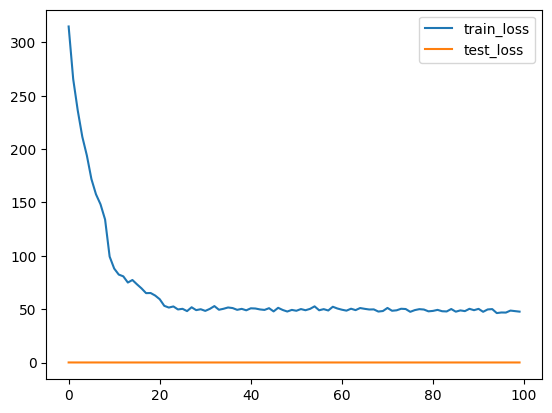

In [23]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])